In [25]:
import pandas as pd
import psycopg2
import yfinance as yf
import warnings
from tqdm import tqdm
import numpy as np
warnings.filterwarnings("ignore")
DB_HOST = 'localhost'
DB_NAME = 'us'
DB_USER = 'postgres'
DB_PASS = 'buddyrich134'
conn = psycopg2.connect(host=DB_HOST, dbname=DB_NAME, user=DB_USER, password=DB_PASS)
cursor = conn.cursor()
cursor.execute("SELECT distinct code from public.maincode where listed = 'us100';")
conn.commit()
code_list_1 = [i[0] for i in cursor.fetchall()]
code_list = code_list_1 + ['QQQ', "VOO"]
cursor.execute("SELECT distinct code from public.maincode where listed = 'us30';")
conn.commit()
code_list_2 = [i[0] for i in cursor.fetchall()]
code_list = code_list + code_list_2
code_list = list(set(code_list))
cursor.execute("SELECT distinct code from public.maincode where listed = 'us500';")
conn.commit()
code_list_3 = [i[0] for i in cursor.fetchall()]
code_l = [i for i in code_list_3 if i not in code_list]
code_list = code_list + code_l
code_list = list(set(code_list))
len(code_list)

521

In [100]:
import pandas as pd
import itertools
prices = yf.download(code_list, start='2023-01-01', rounding=2)['Open']

[*********************100%***********************]  521 of 521 completed

1 Failed download:
['US100']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Empty DataFrame
Columns: [Stock1, Stock2, Correlation]
Index: []


In [106]:

returns = prices.pct_change().dropna(how='all', axis=1).dropna(how='all', axis=0)
stock_pairs = list(itertools.combinations(returns.columns, 2))
# Store correlation results
correlations = []

# Calculate correlation for each pair
for stock1, stock2 in stock_pairs:
    corr = returns[stock1].corr(returns[stock2])
    correlations.append((stock1, stock2, corr))

# Convert to DataFrame for filtering
correlation_df = pd.DataFrame(correlations, columns=["Stock1", "Stock2", "Correlation"])

# Filter pairs with high correlation
high_corr_pairs = correlation_df[correlation_df["Correlation"] > 0.9]

# Sort by correlation for analysis
high_corr_pairs = high_corr_pairs.sort_values(by="Correlation", ascending=False)

# Output
print(high_corr_pairs)


       Stock1 Stock2  Correlation
89187    GOOG  GOOGL     0.997671
122060    NWS   NWSA     0.929513
128237    QQQ    VOO     0.927008
83259     FOX   FOXA     0.926943


In [112]:
correlation_df[(correlation_df["Correlation"] > 0.8)& (correlation_df["Correlation"] < 0.9)].sort_values(by=['Correlation'], ascending=False)

,Stock1,Stock2,Correlation
22491,AVB,EQR,0.880679
12945,AMAT,LRCX,0.878680
63454,DHI,LEN,0.867664
53318,CPT,MAA,0.863814
12927,AMAT,KLAC,0.859457
64407,DIA,VOO,0.858806
74863,EQR,UDR,0.857577
58404,CVX,HES,0.855193
115403,MLM,VMC,0.852642
116759,MPC,VLO,0.851467


<Axes: xlabel='Date'>

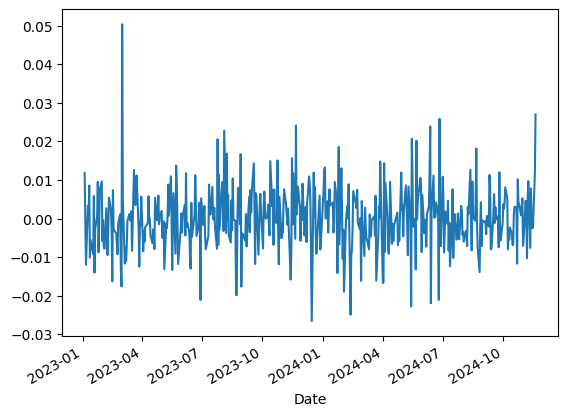

In [120]:
a = prices[['HD', 'LOW']].pct_change().dropna()
a['c'] = a['HD'] - a['LOW']
a['c'].plot()

In [122]:
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |███████████                     | 3.7 MB 169 kB/s eta 0:00:43^C

ERROR: Operation cancelled by user
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [125]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(a['LOW'].dropna())
adf_stat = adf_result[0]  
p_value = adf_result[1]  
critical_values = adf_result[4]

print("ADF Statistic:", adf_stat)
print("p-value:", p_value)
print("Critical Values:", critical_values)

if p_value < 0.05:
    print("The spread is stationary (p-value < 0.05).")
else:
    print("The spread is non-stationary (p-value >= 0.05).")


ADF Statistic: -21.118858615536148
p-value: 0.0
Critical Values: {'1%': np.float64(-3.444280551073031), '5%': np.float64(-2.867682902679315), '10%': np.float64(-2.5700419306592934)}
The spread is stationary (p-value < 0.05).


In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2
import yfinance as yf
import warnings
from tqdm import tqdm
import numpy as np
import statsmodels.api as sm

dff = pd.DataFrame()
k = 6
cols = [i for i in range(2, k)]
for code in tqdm(code_list[:], desc='10'):
    df = yf.download(code, start='2024-01-01', rounding=2, ignore_tz=True, progress=False)
    if len(df) == 0: continue
    pct_close_w = df[['Open']].pct_change().iloc[1:, :]
    indexes = pct_close_w.index
    tickers = pct_close_w.iloc[:, :].columns
    indices = indexes[52:]
    forecast = np.zeros((len(indices), len(tickers)))
    for index, date in enumerate(indices):
        pct_train = pct_close_w.loc[indexes[index]:date]
        for i in range(len(tickers)):
            series = pct_train[tickers[i]]
            if series.isna().any():
                prediction = 0
                print(tickers[i], "failed at", date)
                continue
            else:
                model = sm.tsa.arima.ARIMA(series, order=(2, 0, 0))
                model_fit = model.fit()
                prediction = model_fit.forecast().values[0]
            forecast[index, i] = prediction
    factor = pd.DataFrame(forecast, columns=tickers, index=indices)
    rets = []
    for i in range(2, k):
        factor = pd.DataFrame(forecast, columns=tickers, index=indices)
        factor.columns = ['Factor']
        factor1 = factor
        factor1['Clo'] = df['Open'].pct_change()
        factor1['Factor'] = factor1['Factor'].shift(i)
        factor1['signal'] = factor1.apply(lambda x: 1 if x['Factor'] >= 0 else -1, axis=1)
        factor1['ret'] = factor1['Clo'] * factor1['signal']
        rets.append(factor1['ret'].cumsum().iloc[-1])
    rets.append(df['Open'].pct_change().cumsum().iloc[-1])
    dff[code] = rets

10:  31%|███▏      | 163/521 [07:17<15:53,  2.66s/it]
1 Failed download:
['US100']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
10: 100%|██████████| 521/521 [23:27<00:00,  2.70s/it]


In [90]:
df1 = dff.iloc[:-1, :]
df2 = dff.iloc[-1, :]
df3 = df1 - df2
l = list(df3[df3 > 0.1].dropna(axis=1, how='all').columns)

In [93]:
for i in l:
    a = yf.download(i, start='2024-11-15', progress=False)
    if a['Close'].iloc[0] > 100: print(i)

POOL
PEP
UNP
EQIX
GL
KLAC
TGT
UPS
KMB
ASML
CCI
ADI
MCD
IQV
JKHY
ZTS
HES
ALGN
TSLA
APD
REGN
LULU
LLY
TXN
ADBE
A
GS
PSX
TEAM
JBL
EG
BIIB
SBAC
STE
ELV
DHR
VRSN
IDXX
JNJ
AMGN
ARE
TDY
SNPS
PODD
AMT
NDSN
ZBH
PTC
BIO
EPAM
ROK
NSC
MAA
TER
ALB
KEYS
ABBV
COP
ABT
CDW
DOV
CHTR
NUE
ACN
TMO
PLD
DPZ
NXPI
PDD
TFX
ILMN
HUM
JBHT
ULTA
RVTY
CHRW
CVX
AVY
MPWR
ZBRA
GPN
MDB
FDS
MKTX
MSCI
PPG
BA
BDX
WST


[*********************100%***********************]  1 of 1 completed
arma model for top 1, enumerate by da: 100%|██████████| 171/171 [00:02<00:00, 59.33it/s]


                Open
Date                
2024-10-23  0.001595
2024-10-24 -0.001051
2024-10-25 -0.002508
2024-10-28 -0.004178
2024-10-29  0.001958
2024-10-30 -0.004379
2024-10-31 -0.004146
2024-11-01  0.003591
2024-11-04 -0.007767
2024-11-05 -0.004882
2024-11-06 -0.006521
2024-11-07 -0.004068
2024-11-08  0.007778
2024-11-11 -0.000068
2024-11-12 -0.008848
2024-11-13 -0.006507
2024-11-14  0.000807
2024-11-15  0.001320
2024-11-18  0.000314
2024-11-19 -0.002628


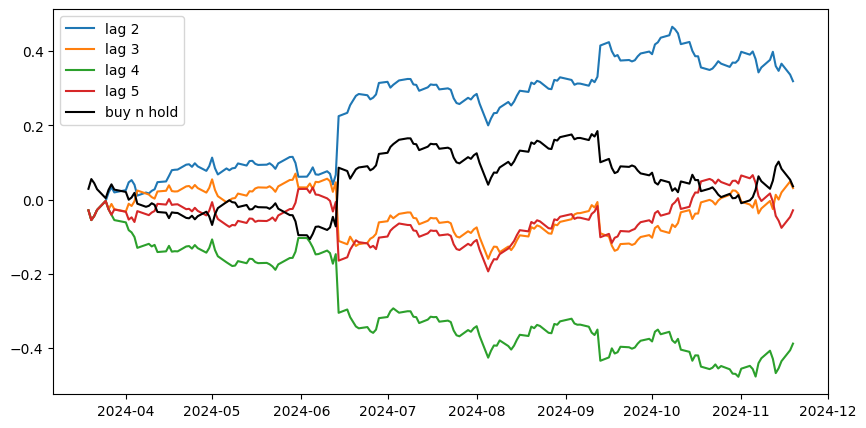

In [99]:
c('ADBE', start='2024-01-01')

In [ ]:
for i in list(df3[df3 > 0.1].dropna(axis=1, how='any').columns)[10:]:
    print(i)
    c(i, start='2024-01-01')

In [85]:
def c(code, start='2024-01-01', end='2024-11-20'):
    df = yf.download([code], start=start, end=end,rounding=2, ignore_tz=True)
    pct_close_w = df[['Open']].pct_change().iloc[1:, :]
    indexes = pct_close_w.index
    tickers = pct_close_w.iloc[:, :].columns
    indices = indexes[52:]
    forecast = np.zeros((len(indices), len(tickers)))
    for index, date in enumerate(tqdm(indices, desc=f"arma model for top {len(tickers)}, enumerate by da")):
        pct_train = pct_close_w.loc[indexes[index]:date]
        for i in range(len(tickers)):
            series = pct_train[tickers[i]]
            if series.isna().any():
                prediction = 0
                print(tickers[i], "failed at", date)
                continue
                ###### ARIMA ma
            else:
                model = sm.tsa.arima.ARIMA(series, order=(2, 0, 0))
                model_fit = model.fit()
                prediction = model_fit.forecast().values[0]
            forecast[index, i] = prediction
    factor = pd.DataFrame(forecast, columns=tickers, index=indices)
    print(factor.tail(20))
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    for i in range(2, 6):
        factor = pd.DataFrame(forecast, columns=tickers, index=indices)
        factor.columns = ['Factor']
        factor1 = factor#.loc['2024-01-01':, :]
        factor1['Clo'] = df['Open'].pct_change()
        # factor1['Clo'] = factor1.apply(lambda x: 0 if abs(x['Clo']) > 0.03 else x['Clo'], axis=1)
        factor1['Factor'] = factor1['Factor'].shift(i) # 3: lag 1 day of signal
        # factor1.dropna(inplace=True)
        factor1['signal'] = factor1.apply(lambda x: 1 if x['Factor'] >= 0 else -1, axis=1)
        factor1['ret'] = factor1['Clo'] * factor1['signal']
        ax.plot(factor1['ret'].cumsum(), label='lag {}'.format(i))
    ax.plot(pct_close_w[factor1.index[0]:].cumsum(), label='buy n hold', color='black')
    plt.legend()
    plt.show()
    return None


[*********************100%***********************]  1 of 1 completed


2024-03-19 00:00:00


arma model for top 1, enumerate by da: 100%|██████████| 171/171 [00:02<00:00, 63.32it/s]


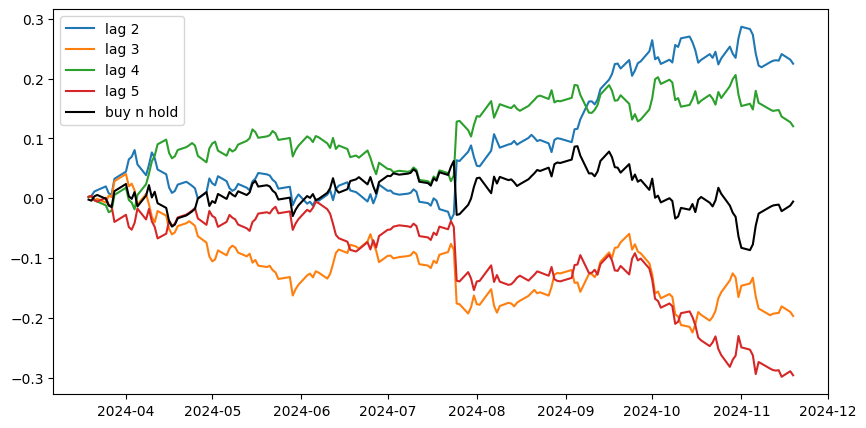

In [39]:
import pandas as pd
import psycopg2
import yfinance as yf
import warnings
from tqdm import tqdm
import numpy as np
df = yf.download(['INVH'], start='2024-01-01', rounding=2, ignore_tz=True)
import statsmodels.api as sm
pct_close_w = df[['Open']].pct_change().iloc[1:, :]
indexes = pct_close_w.index
tickers = pct_close_w.iloc[:, :].columns
indices = indexes[52:]
forecast = np.zeros((len(indices), len(tickers)))
print(indices[0])
for index, date in enumerate(tqdm(indices, desc=f"arma model for top {len(tickers)}, enumerate by da")):
    pct_train = pct_close_w.loc[indexes[index]:date]
    for i in range(len(tickers)):
        series = pct_train[tickers[i]]
        if series.isna().any():
            prediction = 0
            print(tickers[i], "failed at", date)
            continue
            ###### ARIMA ma
        else:
            model = sm.tsa.arima.ARIMA(series, order=(2, 0, 0))
            model_fit = model.fit()
            prediction = model_fit.forecast().values[0]
        forecast[index, i] = prediction
factor = pd.DataFrame(forecast, columns=tickers, index=indices)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for i in range(2, 6):
    factor = pd.DataFrame(forecast, columns=tickers, index=indices)
    factor.columns = ['Factor']
    factor1 = factor#.loc['2024-01-01':, :]
    factor1['Clo'] = df['Open'].pct_change()
    # factor1['Clo'] = factor1.apply(lambda x: 0 if abs(x['Clo']) > 0.03 else x['Clo'], axis=1)
    factor1['Factor'] = factor1['Factor'].shift(i) # 3: lag 1 day of signal
    # factor1.dropna(inplace=True)
    factor1['signal'] = factor1.apply(lambda x: 1 if x['Factor'] >= 0 else -1, axis=1)
    factor1['ret'] = factor1['Clo'] * factor1['signal']
    ax.plot(factor1['ret'].cumsum(), label='lag {}'.format(i))
ax.plot(pct_close_w[factor1.index[0]:].cumsum(), label='buy n hold', color='black')
plt.legend()